In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# EDA_1

  =name: *Brand and model name of the bike (Categorical, e.g., "Royal Enfield Classic 350", "Honda Dio")*
  selling_price: Listed selling price in INR (Numeric, e.g., 175000, 45000)
  year: Manufacturing year of the bike (Numeric, e.g., 2019, 2015)
  seller_type: Seller category, either "Individual" or "Dealer" (Categorical)
  owner: Ownership history, e.g., "1st owner", "2nd owner" (Categorical)
  km_driven: Total kilometers driven (Numeric, in km, e.g., 12000, 23000)
  ex_showroom_price: Original showroom price in INR (Numeric, e.g., 148114.0, 89643.0, etc,

In [4]:
df=pd.read_csv('BIKE DETAILS.csv')
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [5]:
df.shape

(1061, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [7]:
df.dtypes

name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

In [8]:
df.isna().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [9]:
#Q1.  What is the range of selling prices in the dataset

In [10]:
min_price = df["selling_price"].min()
max_price = df["selling_price"].max()
price_range = max_price - min_price

print(f"Range of selling prices: {price_range}")

Range of selling prices: 755000


In [11]:
#Q2.  What is the median selling price for bikes in the dataset

In [12]:
median_selling_price = df["selling_price"].median()
print(f"median of selling prices: {median_selling_price}")

median of selling prices: 45000.0


In [13]:
#Q3.  What is the most common seller type

In [14]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [15]:
df.seller_type.unique()

array(['Individual', 'Dealer'], dtype=object)

In [16]:
df['seller_type'].value_counts(normalize=True)*100

seller_type
Individual    99.434496
Dealer         0.565504
Name: proportion, dtype: float64

<Axes: xlabel='seller_type', ylabel='count'>

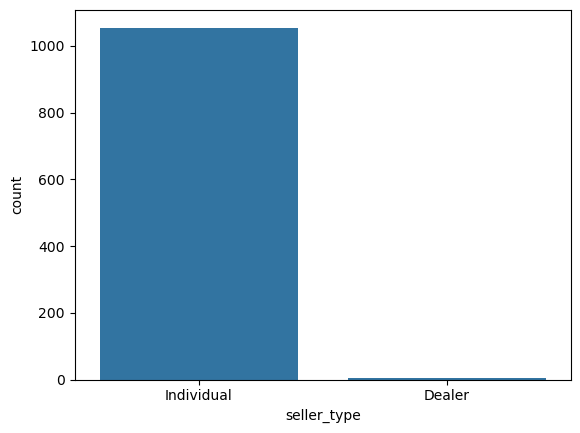

In [17]:
sns.countplot(x=df['seller_type'])

In [18]:
# insights >> Most common saller type is Individual

In [19]:
#Q4.  How many bikes have driven more than 50,000 kilometers

In [20]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [21]:
df['km_driven']

0          350
1         5650
2        12000
3        23000
4        21000
         ...  
1056    500000
1057     33000
1058     35000
1059     53000
1060     92233
Name: km_driven, Length: 1061, dtype: int64

In [22]:
count = (df['km_driven'] > 50000).sum()
print(count)              

170


In [23]:
# insights >> 170 bikes have driven more than 50,000 kilometers

In [24]:
#Q5. What is the average km_driven value for each ownership type

In [25]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [26]:
df.groupby(["owner"])["km_driven"].mean().sort_values(ascending = False).reset_index()

,owner,km_driven
0,4th owner,311500.000000
1,2nd owner,39288.991870
2,3rd owner,33292.181818
3,1st owner,32816.583333


In [27]:
#Q6.  What proportion of bikes are from the year 2015 or older

In [28]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [29]:
df['year']

0       2019
1       2017
2       2018
3       2015
4       2011
        ... 
1056    2010
1057    2012
1058    2013
1059    2009
1060    2008
Name: year, Length: 1061, dtype: int64

In [30]:
bike_df = len(df['year'])
old_bikes_count  = (df['year'] < 2015).sum()
proportion = old_bikes_count / bike_df
print(f"Proportion of bikes from 2015 or older: {proportion:.2%}")

Proportion of bikes from 2015 or older: 47.22%


In [31]:
# insights >> proportion of bikes are from the year 2015 or older is 47.22%

In [32]:
# Q7.  What is the trend of missing values across the dataset

Missing Values per Column:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Missing Percentage per Column:
 name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64


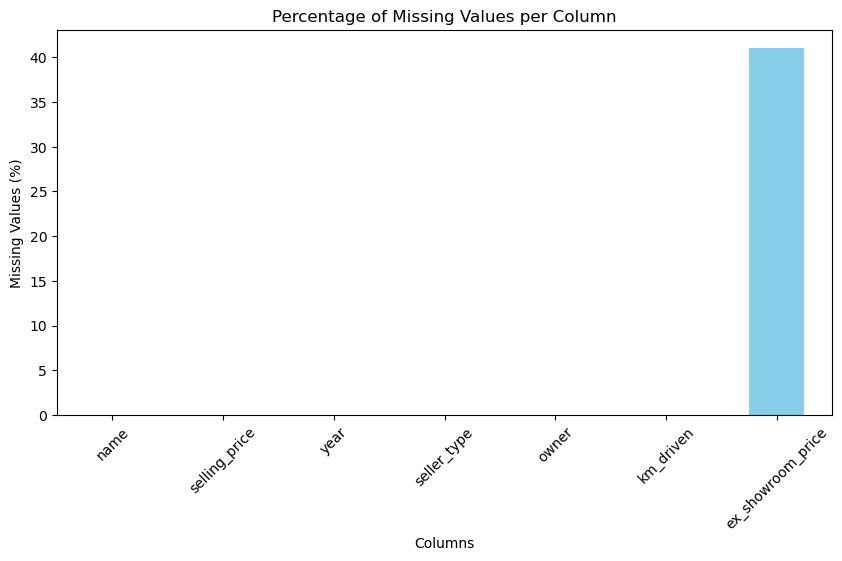

In [33]:
missing_values = df.isnull().sum()

# Calculate percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Print missing values trend
print("Missing Values per Column:\n", missing_values)
print("\nMissing Percentage per Column:\n", missing_percentage)

# Plot missing values using a bar chart
plt.figure(figsize=(10, 5))
missing_percentage.plot(kind="bar", color="skyblue")
plt.title("Percentage of Missing Values per Column")
plt.ylabel("Missing Values (%)")
plt.xlabel("Columns")
plt.xticks(rotation=45)
plt.show()


In [34]:
#  What is the highest ex_showroom_price recorded, and for which bike

In [35]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [36]:
df.ex_showroom_price.max()

1278000.0

In [37]:
df.groupby(["name"])["ex_showroom_price"].max().sort_values(ascending = False).reset_index()

,name,ex_showroom_price
0,Harley-Davidson Street Bob,1278000.0
1,Suzuki GSX S750,752020.0
2,Kawasaki Ninja 650 [2018-2019],599000.0
3,Harley-Davidson Street 750,534000.0
4,Kawasaki Ninja 300,360000.0
...,...,...
274,Yamaha Gladiator,NaN
275,Yamaha RX135,NaN
276,Yamaha RXG,NaN
277,Yamaha Rx,NaN


In [38]:
print(f'The highest ex_showroom_price recorded :{df.ex_showroom_price.max()}, and  bike : Harley-Davidson Street Bob')

The highest ex_showroom_price recorded :1278000.0, and  bike : Harley-Davidson Street Bob


In [39]:
#Q9. What is the total number of bikes listed by each seller type

In [40]:
df.groupby(["seller_type"])["year"].sum().sort_values(ascending = False).reset_index()

,seller_type,year
0,Individual,2124647
1,Dealer,12066


In [41]:
#Q10. What is the relationship between selling_price and km_driven for first-owner bikes

In [42]:
df.owner.unique()

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

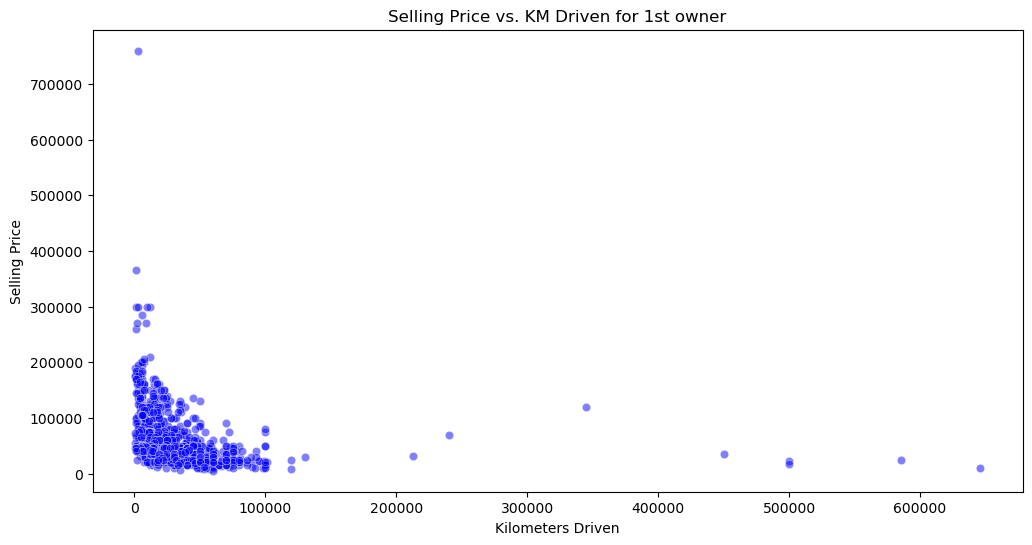

Correlation between Selling Price and KM Driven: -0.24


In [43]:
first_owner_bikes = df[df["owner"] == "1st owner"]  # Adjust column name if needed

# Scatter plot to visualize relationship
plt.figure(figsize=(12, 6))
sns.scatterplot(x=first_owner_bikes["km_driven"], y=first_owner_bikes["selling_price"], alpha=0.5, color="blue")
plt.title("Selling Price vs. KM Driven for 1st owner")
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.show()

# Calculate correlation coefficient
correlation = first_owner_bikes["km_driven"].corr(first_owner_bikes["selling_price"])
print(f"Correlation between Selling Price and KM Driven: {correlation:.2f}")

In [44]:
#Q11.  Identify and remove outliers in the km_driven column using the IQR method

<Axes: ylabel='km_driven'>

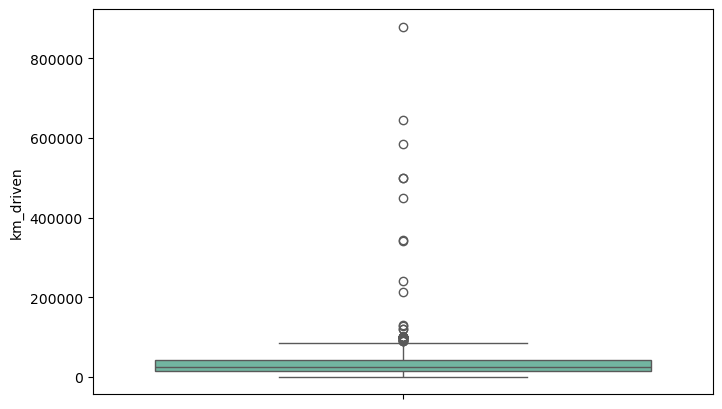

In [45]:
plt.figure(figsize=(8,5))
sns.boxplot(data = df['km_driven'], palette='Set2')

In [46]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [47]:
def detect_outliers(columns):
    outlier_indices = []
    for column in columns:
        Q1=df[column].quantile(0.25)
        Q3=df[column].quantile(0.75)
        IQR = Q3-Q1
        
        #mask is a boolean condition
        mask = (df[column] >= (Q1-1.5*IQR)) & (df[column] <= (Q3+1.5*IQR))
        mask = mask.to_numpy() #bool to numpy array
        
        #find the indices of values that do not satisfy the mask condition>> that will be outlier
        false_indices = np.argwhere(~mask)
        outlier_indices.append(false_indices)
    return np.unique(np.concatenate(outlier_indices).ravel())

In [48]:
col=['km_driven']
outlier_indices = detect_outliers(col)
outlier_indices

array([  91,   93,  115,  135,  154,  184,  363,  470,  474,  477,  511,
        535,  548,  575,  592,  598,  610,  630,  642,  668,  687,  695,
        712,  714,  716,  726,  773,  782,  797,  830,  872,  877,  901,
        903,  908,  930, 1039, 1056, 1060], dtype=int64)

In [49]:
# Remove outliers from DataFrame
df_cleaned = df.drop(index=outlier_indices).reset_index(drop=True)

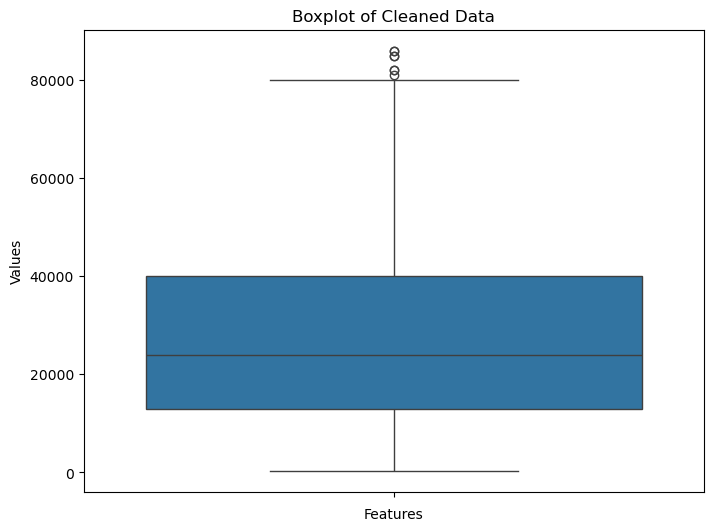

In [50]:
# Create a boxplot for df_cleaned
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned['km_driven'])

# Customize the plot
plt.title("Boxplot of Cleaned Data")
plt.xlabel("Features")
plt.ylabel("Values")

# Show the plot
plt.show()

In [51]:
#Q12.  Perform a bivariate analysis to visualize the relationship between year and selling_price

In [52]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

<Axes: xlabel='year', ylabel='selling_price'>

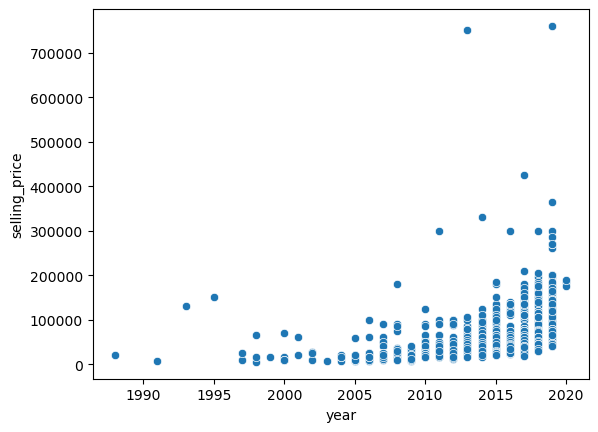

In [53]:
sns.scatterplot(x = 'year', y = "selling_price", data=df, palette = 'coolwarm')

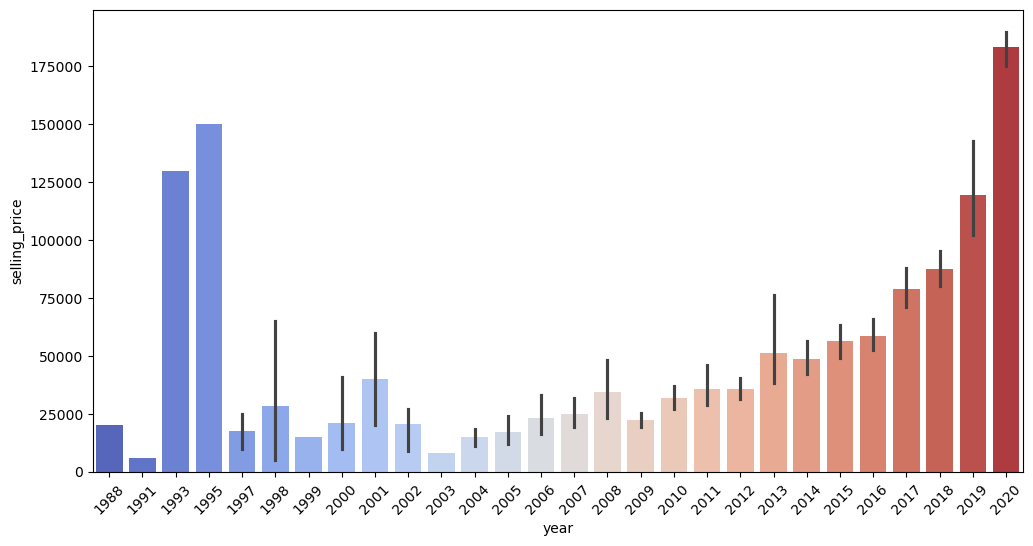

In [54]:
plt.figure(figsize=(12, 6))
sns.barplot(x='year',y='selling_price',data=df,palette='coolwarm')
plt.xticks(rotation=45)
plt.show()

In [55]:
# insights >> 2020,2019,1993,1995 this year most bike sold

In [56]:
#Q13.  What is the average depreciation in selling price based on the bike's age (current year - manufacturing year

In [57]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [58]:
# Get the current year
current_year = pd.Timestamp.now().year

# Calculate bike age
df['bike_age'] = current_year - df['year']

# Calculate depreciation
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']

# Average depreciation per bike age
avg_depreciation = df.groupby('bike_age')['depreciation'].mean().reset_index()

print(avg_depreciation)

    bike_age  depreciation
0          5 -34260.000000
1          6   2954.562500
2          7  13023.194805
3          8  22306.082353
4          9  28328.190476
5         10  28013.275000
6         11  34505.606061
7         12  43086.886792
8         13  37317.648649
9         14  47102.666667
10        15  45658.928571
11        16  38227.785714
12        17  54732.428571
13        18  42399.000000
14        19  39664.500000
15        20  44852.000000
16        21  36852.000000
17        22           NaN
18        23           NaN
19        24  34852.000000
20        25           NaN
21        26           NaN
22        27           NaN
23        28           NaN
24        30           NaN
25        32           NaN
26        34           NaN
27        37           NaN


In [59]:
#Q14.  Which bike names are priced significantly above the average price for their manufacturing year

In [60]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price', 'bike_age', 'depreciation'],
      dtype='object')

In [61]:
yearly_stats = df.groupby('year')['selling_price'].agg(['mean']).reset_index()
yearly_stats = yearly_stats.rename(columns={'mean': 'avg_price'})

# Merge stats back to the original dataset
df = df.merge(yearly_stats, on='year')


df['high_price_threshold'] = df['avg_price'] 

# Filter bikes priced significantly above the threshold
expensive_bikes = df[df['selling_price'] > df['high_price_threshold']][['name', 'year', 'selling_price']]

print(expensive_bikes)

                                      name  year  selling_price
0                Royal Enfield Classic 350  2019         175000
2      Royal Enfield Classic Gunmetal Grey  2018         150000
3        Yamaha Fazer FI V 2.0 [2016-2018]  2015          65000
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                           Yamaha YZF R3  2019         365000
...                                    ...   ...            ...
1004                  Bajaj Pulsar  NS 200  2016          60000
1005                    TVS Apache RTR 160  2014          60000
1008                    Bajaj Pulsar 220 F  2012          52000
1012                   Bajaj Pulsar NS 200  2014          50000
1023                Bajaj Avenger 220 dtsi  2012          45000

[334 rows x 3 columns]


In [62]:
#Q15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

In [63]:
num_col= [col for col in df.columns if df[col].dtypes != 'object']
num_col

['selling_price',
 'year',
 'km_driven',
 'ex_showroom_price',
 'bike_age',
 'depreciation',
 'avg_price',
 'high_price_threshold']

<Axes: >

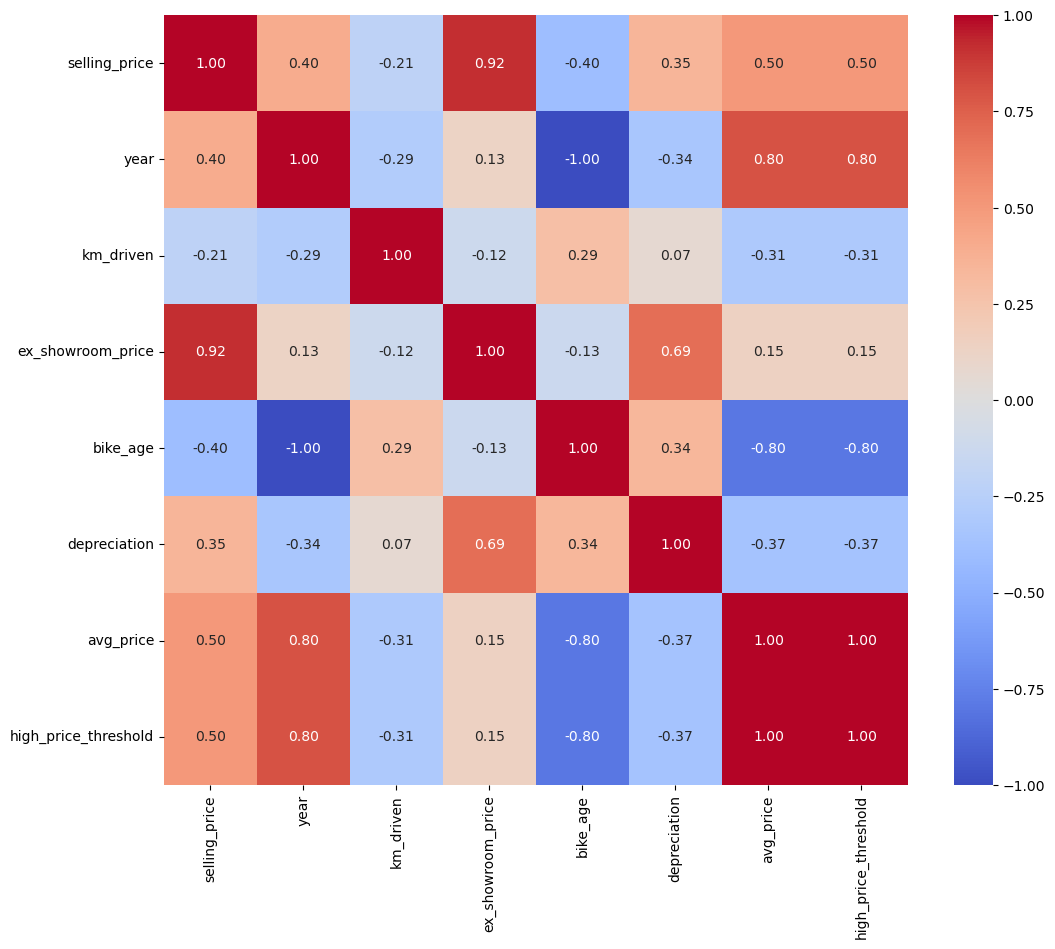

In [64]:
corr = df.corr(numeric_only = True)
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')

# EDA_2

In [66]:
df1=pd.read_csv('Car Sale.csv')
df1.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [67]:
 # Car_id: A unique identifier for each car in the dataset, helping to track individual car entries
 # Date: The date when the car sale transaction took place, formatted as YYYY-MM-DD
 # Customer Name: The name of the customer who purchased the car, represented as a string
 # Gender: The gender of the customer, categorized as "Male" or "Female.
 # Annual Income: The customer's annual income in US dollars, represented as a numeric value
 # Dealer_Name: The name of the dealership selling the car, represented as a string
 # Company: The manufacturer or brand name of the car, such as "Toyota," "Ford," etc
 # Model: The specific model name of the car, such as "Corolla," "Civic," etc
 # Engine: The engine type of the car, such as "V6," "I4," etc
 # Price ($): The selling price of the car in US dollars
 # Transmission: The type of transmission in the car, either "Manual" or "Automatic.
 # Color: The color of the car, represented as a string (e.g., "Red," "Blue")
 # Dealer_No: A unique identifier for each car dealer in the dataset
 # Body Style: The body style of the car, such as "Sedan," "SUV," etc
 # Phone: The phone number of the customer who purchased the car
 # Dealer_Region: The geographical region of the car dealer, such as "North," "South," etc.

In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [69]:
df1.dtypes

Car_id           object
Date             object
Customer Name    object
Gender           object
Annual Income     int64
Dealer_Name      object
Company          object
Model            object
Engine           object
Transmission     object
Color            object
Price ($)         int64
Dealer_No        object
Body Style       object
Phone             int64
Dealer_Region    object
dtype: object

In [70]:
df1.shape

(23906, 16)

In [71]:
df1.isna().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [72]:
#Q1. What is the average selling price of cars for each dealer, and how does it compare across different dealers

In [73]:
df1.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

                                        Dealer_Name     Price ($)
27                                        U-Haul CO  28769.919006
5                                     Classic Chevy  28602.014446
19                             Rabun Used Car Sales  28527.536177
11                                  Iceberg Rentals  28522.958533
8                             Enterprise Rent A Car  28312.580800
23                Scrivener Performance Engineering  28297.371589
9                        Gartner Buick Hyundai Saab  28247.621019
22                                 Saab-Belle Dodge  28190.139888
2                                       Capitol KIA  28189.703822
20                                    Race Car Help  28163.372706
4                            Chrysler of Tri-Cities  28123.091054
24                             Star Enterprises Inc  28113.055244
25                                    Suburban Ford  28112.206758
1                                  C & M Motors Inc  28111.755200
26        

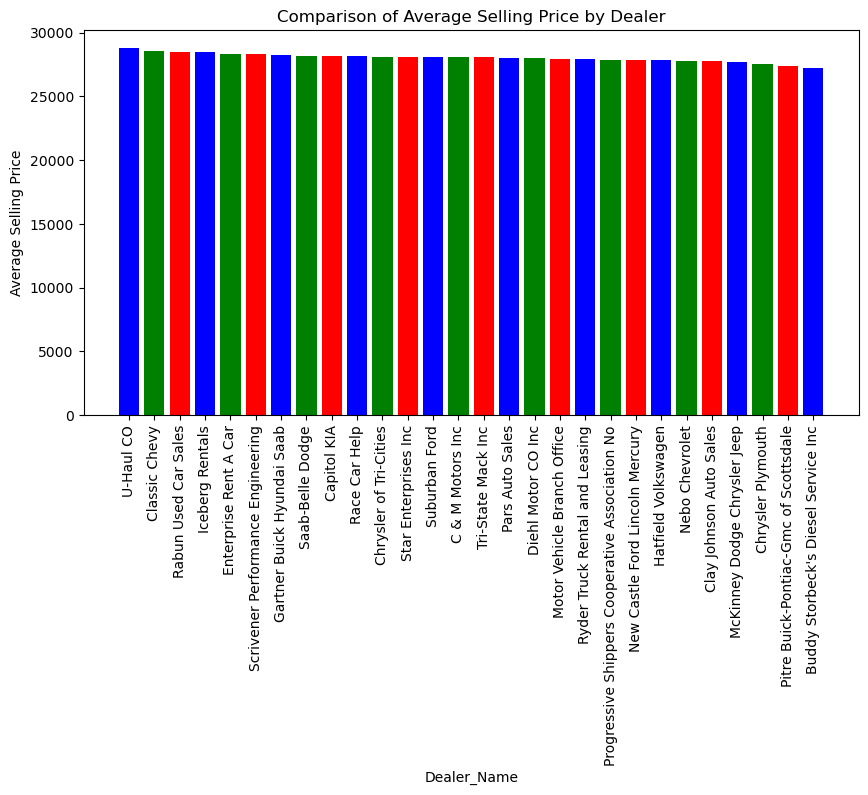

In [74]:
df1.groupby(["Dealer_Name"])["Price ($)"].mean().sort_values(ascending = False).reset_index()

dealer_avg_price = df1.groupby('Dealer_Name')['Price ($)'].mean().reset_index()

# Sort dealers by price for better visualization
dealer_avg_price = dealer_avg_price.sort_values(by='Price ($)', ascending=False)

# Print comparison table
print(dealer_avg_price)

# Plot comparison
plt.figure(figsize=(10, 5))
plt.bar(dealer_avg_price['Dealer_Name'], dealer_avg_price['Price ($)'], color=['blue', 'green', 'red'])
plt.xlabel('Dealer_Name')
plt.ylabel('Average Selling Price')
plt.title('Comparison of Average Selling Price by Dealer')
plt.xticks(rotation=90)
plt.show()

In [75]:
#Q2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends

In [76]:
df1.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [77]:
# Compute standard deviation (σ) of selling price for each brand
brand_variation = df1.groupby('Company')['Price ($)'].std().reset_index()

# Find the brand with the highest variation
highest_variation_brand = brand_variation.loc[brand_variation['Price ($)'].idxmax()]

print("Brand with Highest Price Variation:")
print(highest_variation_brand)

Brand with Highest Price Variation:
Company           Lincoln
Price ($)    19658.050211
Name: 15, dtype: object


In [78]:
#     High variation (High Std Dev) → The brand has a wide price range, meaning it sells both budget and premium models.
#    Low variation (Low Std Dev) → The brand has a more consistent pricing strategy, likely focusing on a specific market segment.



In [79]:
#Q3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare

In [80]:
df1.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

Interquartile Range (IQR) for Each Transmission Type:
                  IQR
Transmission         
Auto          16500.0
Manual        17000.0


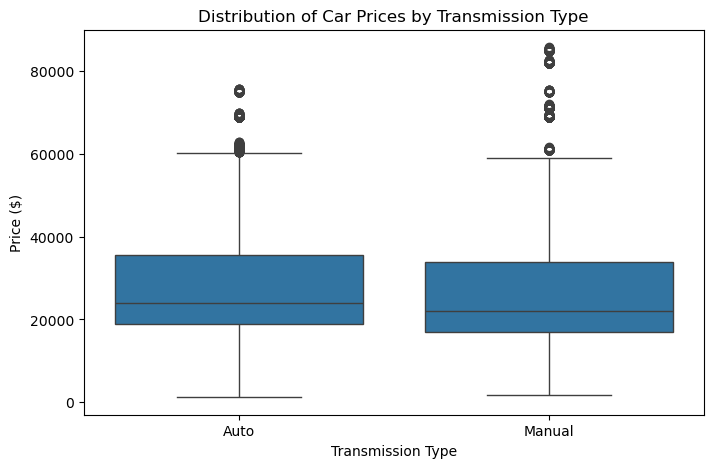

In [81]:
iqr_values = df1.groupby('Transmission')['Price ($)'].quantile([0.25, 0.75]).unstack()
iqr_values['IQR'] = iqr_values[0.75] - iqr_values[0.25]

# Print IQR values
print("Interquartile Range (IQR) for Each Transmission Type:")
print(iqr_values[['IQR']])

# Box Plot for Distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x='Transmission', y='Price ($)', data=df1)
plt.xlabel("Transmission Type")
plt.ylabel("Price ($)")
plt.title("Distribution of Car Prices by Transmission Type")
plt.show()

In [82]:
#Q4.  What is the distribution of car prices across different region

In [83]:
df1.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [84]:
region_summary = df1.groupby("Dealer_Region")["Price ($)"].describe()
print(region_summary)

                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco          34000.0  85600.0  
Scottsdale     3

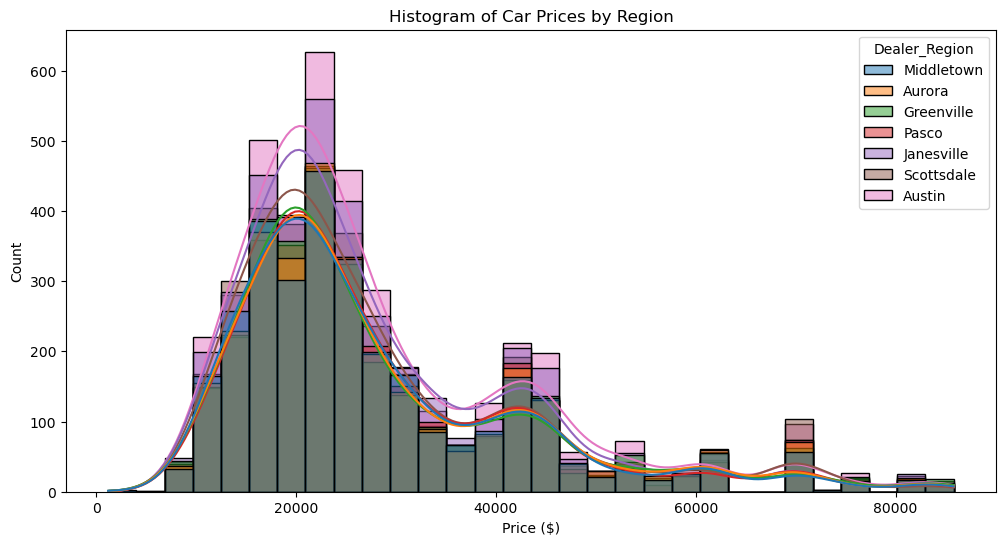

In [85]:
plt.figure(figsize=(12, 6))
sns.histplot(df1, x="Price ($)", hue="Dealer_Region", bins=30, kde=True)
plt.title("Histogram of Car Prices by Region")
plt.show()

In [86]:
#Q5.  What is the distribution of cars based on body styles

In [87]:
df1.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

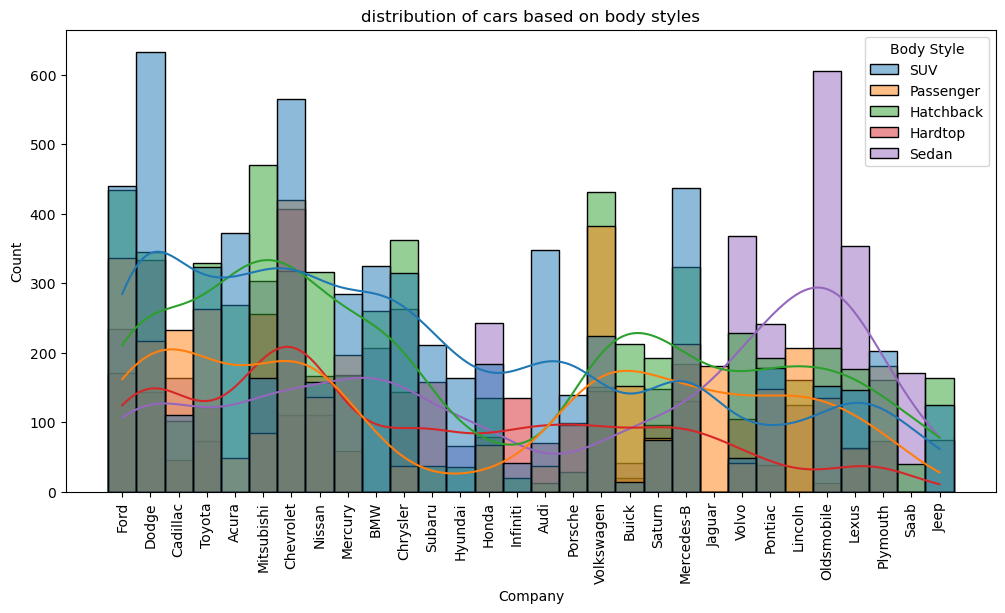

In [88]:
plt.figure(figsize=(12, 6))
sns.histplot(df1, x="Company", hue="Body Style", bins=30, kde=True)
plt.title("distribution of cars based on body styles")
plt.xticks(rotation = 90)
plt.show()

In [89]:
#Q6.  How does the average selling price of cars vary by customer gender and annual income

In [90]:
df1.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [91]:
avg_price_by_gender_income = df1.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().reset_index()
print(avg_price_by_gender_income)

      Gender  Annual Income     Price ($)
0     Female          13500  28132.038732
1     Female         106000  46001.000000
2     Female         121000  20000.000000
3     Female         190000  19001.000000
4     Female         211000  51000.000000
...      ...            ...           ...
3437    Male        6600000  39000.000000
3438    Male        6800000  15000.000000
3439    Male        7650000  21000.000000
3440    Male        8000000  85000.000000
3441    Male       11200000  26001.000000

[3442 rows x 3 columns]


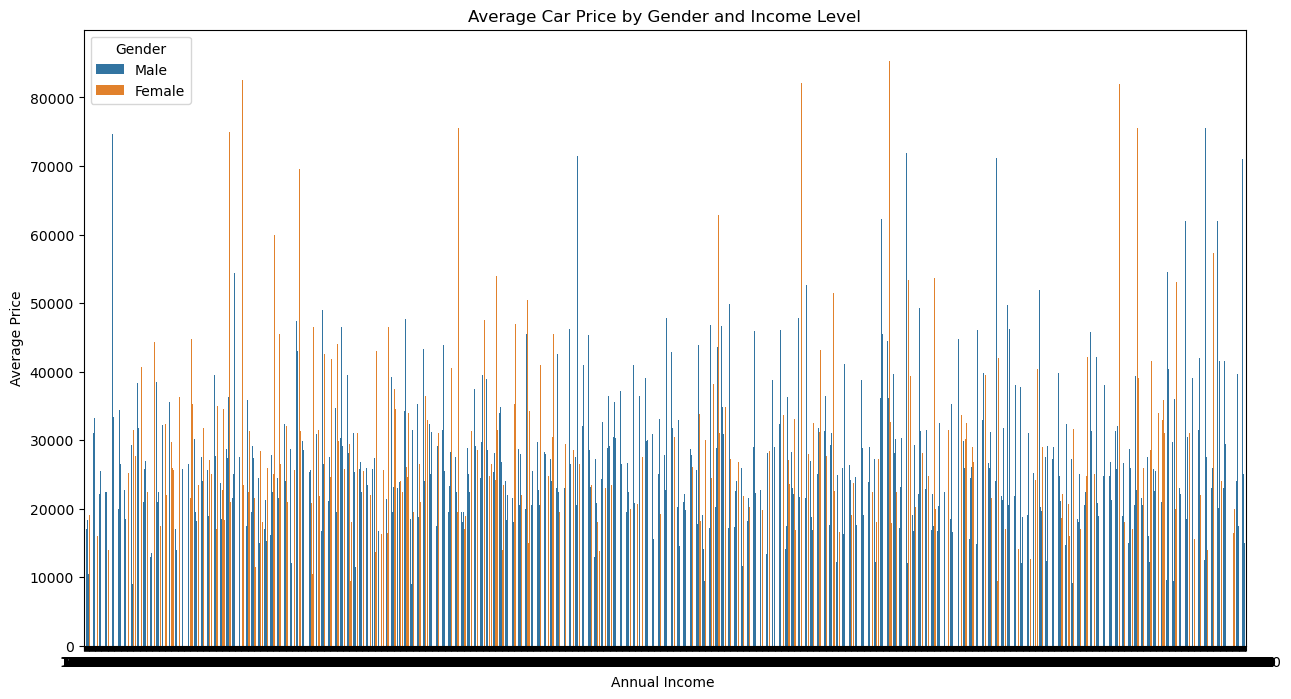

In [92]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Annual Income', y='Price ($)', hue='Gender', data=avg_price_by_gender_income)
plt.title("Average Car Price by Gender and Income Level")
plt.ylabel("Average Price")
plt.xlabel("Annual Income ")
plt.legend(title="Gender")
plt.show()

In [93]:
#Q7.  What is the distribution of car prices by region, and how does the number of cars sold vary by region

In [94]:
df1.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

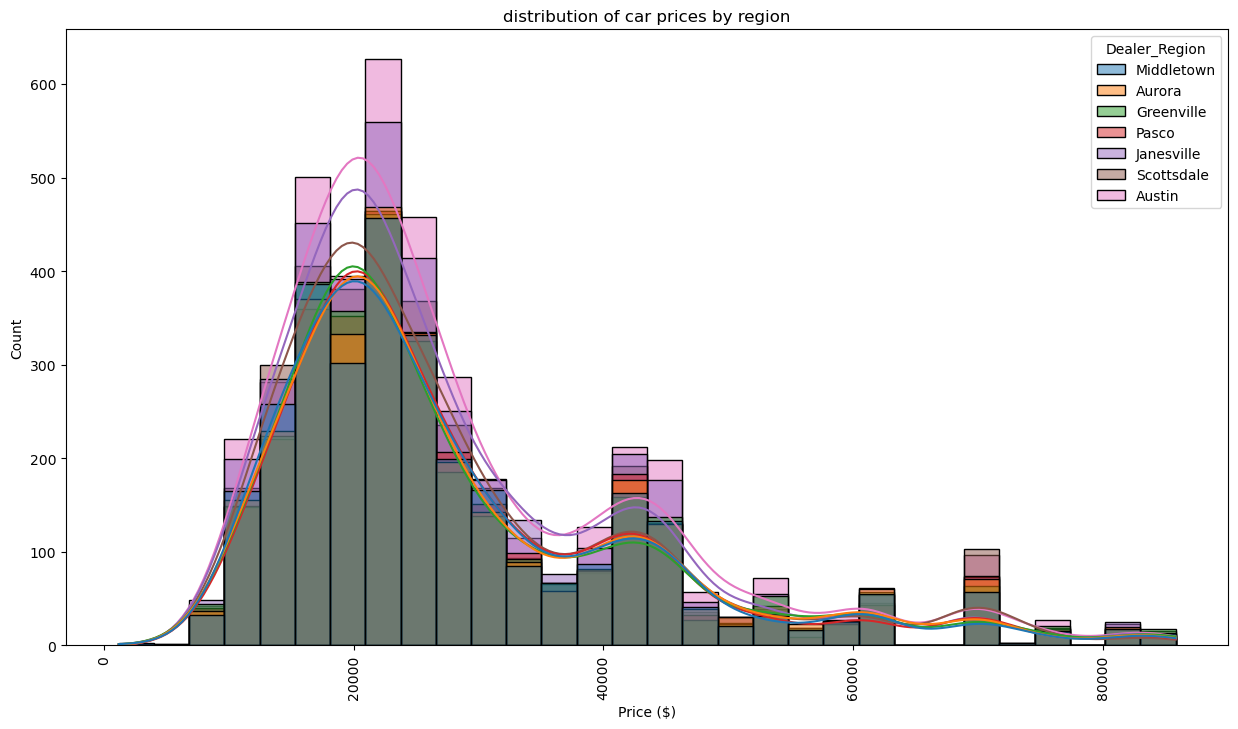

In [95]:
plt.figure(figsize=(15, 8))
sns.histplot(df1, x="Price ($)", hue="Dealer_Region", bins=30, kde=True)
plt.title("distribution of car prices by region")
plt.xticks(rotation = 90)
plt.show()

In [96]:
#Q8.  How does the average car price differ between cars with different engine sizes

In [97]:
df1.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [98]:
df1.Engine.unique()

array(['DoubleÂ\xa0Overhead Camshaft', 'Overhead Camshaft'], dtype=object)

In [99]:
df1.groupby(['Engine'])['Price ($)'].mean().reset_index()

,Engine,Price ($)
0,DoubleÂ Overhead Camshaft,28248.525972
1,Overhead Camshaft,27914.710631


In [100]:
#Q9. How do car prices vary based on the customer’s annual income bracket

In [101]:
avg_price_by_income = df1.groupby(['Annual Income'])['Price ($)'].value_counts(normalize=True)
avg_price_by_income

Annual Income  Price ($)
10080          22801        1.000000
13500          22000        0.058031
               19000        0.051015
               21000        0.040963
               26000        0.036033
                              ...   
6600000        39000        1.000000
6800000        15000        1.000000
7650000        21000        1.000000
8000000        85000        1.000000
11200000       26001        1.000000
Name: proportion, Length: 13908, dtype: float64

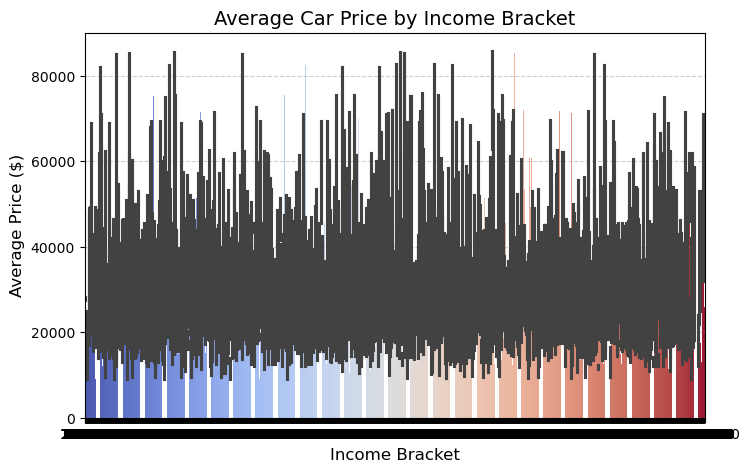

In [102]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Annual Income', y='Price ($)', data=df1, palette='coolwarm')

plt.title("Average Car Price by Income Bracket", fontsize=14)
plt.ylabel("Average Price ($)", fontsize=12)
plt.xlabel("Income Bracket", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [103]:
# Q10. What are the top 5 car models with the highest number of sales, and how does their price distribution look

In [104]:
df1.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [105]:
top_models = df1['Model'].value_counts().head(5)
print(top_models)

Model
Diamante      418
Silhouette    411
Prizm         411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


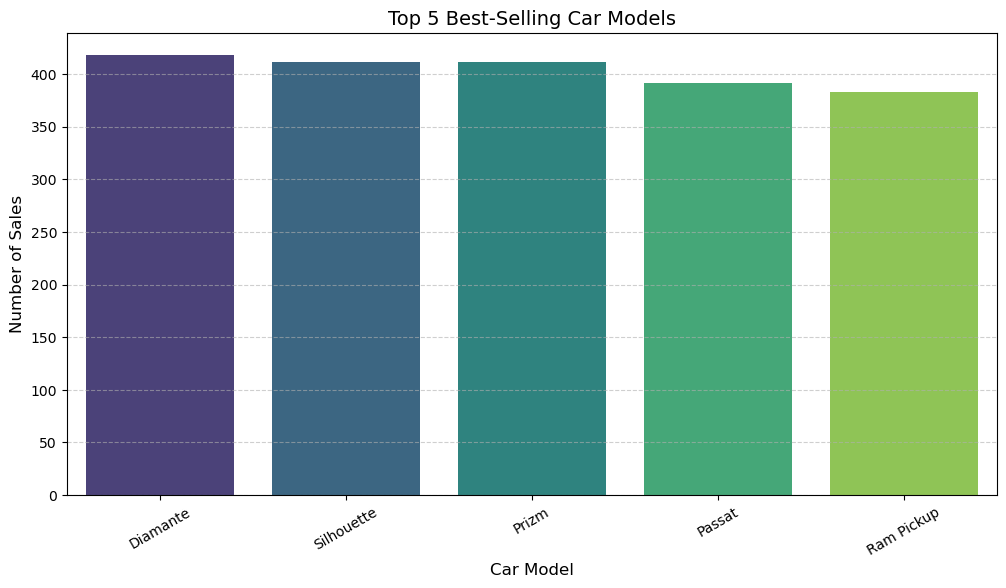

In [106]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_models.index, y=top_models.values, palette='viridis')

plt.title("Top 5 Best-Selling Car Models", fontsize=14)
plt.xlabel("Car Model", fontsize=12)
plt.ylabel("Number of Sales", fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

In [107]:
#Q11.  How does car price vary with engine size across different car colors, and which colors have the highest price variation

In [108]:
df1.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [109]:
df1.Color.unique()

array(['Black', 'Red', 'Pale White'], dtype=object)

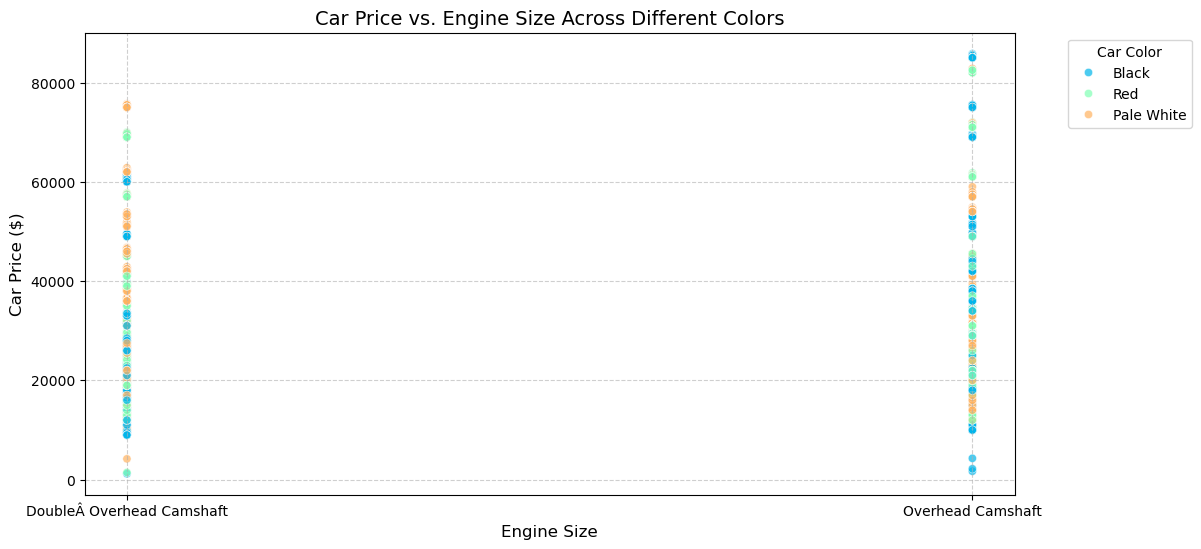

In [110]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df1, x='Engine', y='Price ($)', hue='Color', palette='rainbow', alpha=0.7)

plt.title("Car Price vs. Engine Size Across Different Colors", fontsize=14)
plt.xlabel("Engine Size", fontsize=12)
plt.ylabel("Car Price ($)", fontsize=12)
plt.legend(title="Car Color", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

In [111]:
#Q12.  Is there any seasonal trend in car sales based on the date of sale

In [112]:
df1.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [113]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [114]:
df1['Month'] = df1['Date'].dt.month_name()
df1['Year'] = df1['Date'].dt.year

In [115]:
monthly_sales = df1.groupby(['Year', 'Month']).size().reset_index(name='Sales')

# Order months correctly
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values(['Year', 'Month'])

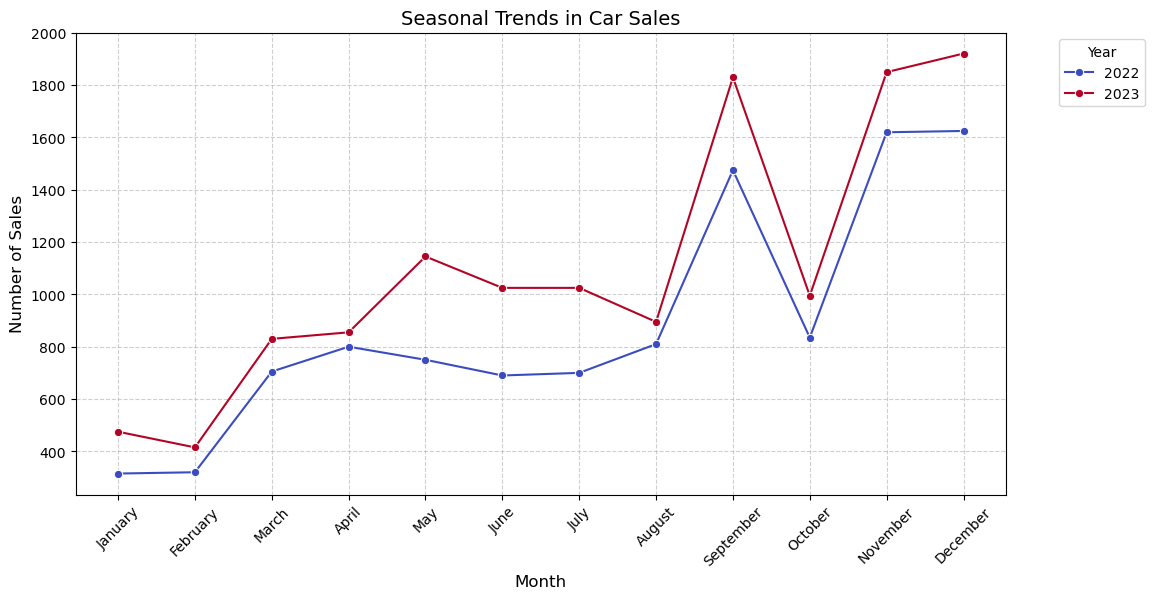

In [116]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='Year', marker='o', palette='coolwarm')

plt.title("Seasonal Trends in Car Sales", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Sales", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [117]:
#Q13.  How does the car price distribution change when considering different combinations of body style and  transmission type

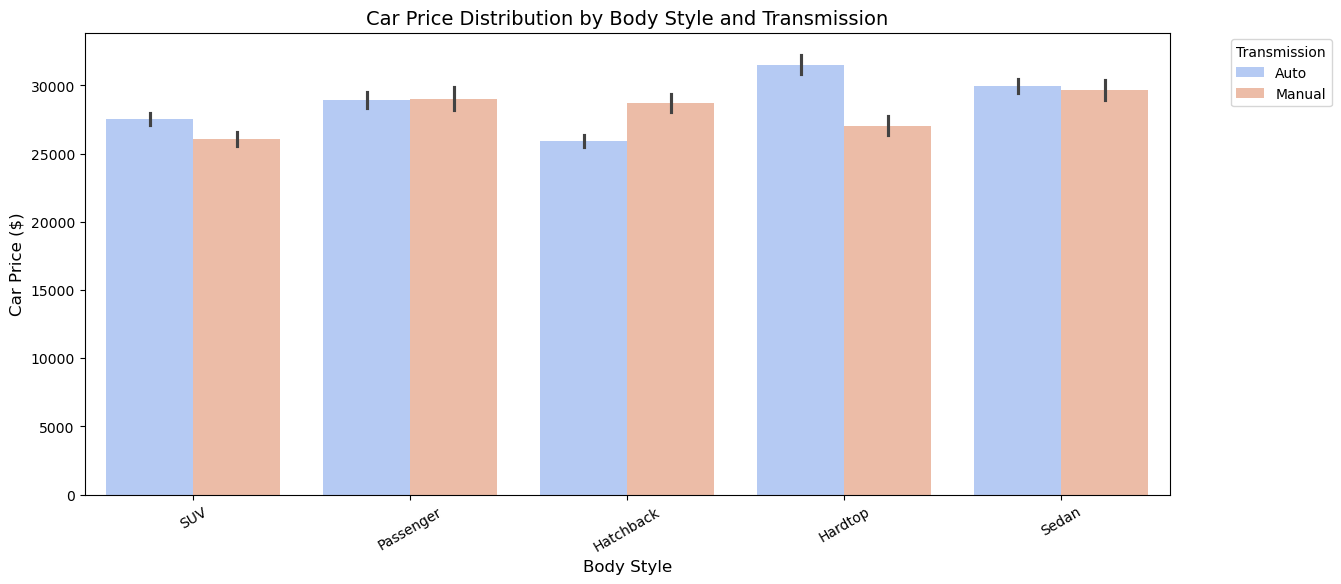

In [118]:


plt.figure(figsize=(14, 6))
sns.barplot(data=df1, x='Body Style', y='Price ($)', hue='Transmission', palette='coolwarm')

plt.title("Car Price Distribution by Body Style and Transmission", fontsize=14)
plt.xlabel("Body Style", fontsize=12)
plt.ylabel("Car Price ($)", fontsize=12)
plt.xticks(rotation=30)
plt.legend(title="Transmission", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()




In [119]:
#Q14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact

In [120]:
df1[['Price ($)', 'Engine', 'Annual Income']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Price ($)      23906 non-null  int64 
 1   Engine         23906 non-null  object
 2   Annual Income  23906 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 560.4+ KB


In [121]:
df1.Engine.unique()

array(['DoubleÂ\xa0Overhead Camshaft', 'Overhead Camshaft'], dtype=object)

In [122]:
df1['Engine'] = df1['Engine'].str.

SyntaxError: invalid syntax (1514632173.py, line 1)

In [ ]:
df1['Engine_Type'] = df1['Engine'].map({'DoubleÂ Overhead Camshaft': 1, 'Overhead Camshaft': 0})

In [ ]:
df1['Engine_Type'] = df1['Engine_Type'].fillna(0)  # Assuming 'Overhead Camshaft' as default

# Drop the original Engine column
df1 = df1.drop(columns=['Engine'])

In [ ]:
corr_matrix = df1[['Price ($)', 'Engine_Type', 'Annual Income']].corr()
print(corr_matrix)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Between Car Price, Engine_Type, and Annual Income")
plt.show()


In [ ]:
#Q15.  How does the average car price vary across different car models and engine types?

In [ ]:
avg_price = df1.groupby(['Model', 'Engine_Type'])['Price ($)'].mean().reset_index()
avg_price = avg_price.sort_values('Price ($)', ascending=False)

print(avg_price.head(10))  # Display top 10

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.barplot(data=avg_price.head(10), x='Model', y='Price ($)', hue='Engine_Type', palette='coolwarm')

plt.title("Average Car Price Across Models & Engine Types", fontsize=14)
plt.xlabel("Car Model", fontsize=12)
plt.ylabel("Average Price ($)", fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.legend(title="Engine Type", labels=["Overhead Camshaft", "Double Overhead Camshaft"])

plt.show()


# EDA_3

In [ ]:
 # Features:
 # product_id: Unique identifier for each product
 # product_name: Name of the product
 # category: Category of the product
 # discounted_price: Discounted price of the product
 # actual_price: Actual price of the product
 # discount_percentage: Percentage of discount for the product
 # rating: Rating of the product (1-5)
 # rating_count: Number of people who voted for the Amazon rating
 # about_product: Description about the product
 # user_id: ID of the user who wrote the review
 # user_name: Name of the user who wrote the review
 # review_id: ID of the user review
 # review_title: Short review
 # review_content: Long review
 # img_link: Image link of the product
 # product_link: Official website link of the product

In [126]:
df2=pd.read_csv('amazon.csv')
df2.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [128]:
df2.shape

(1465, 16)

In [130]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [132]:
df2.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [134]:
df2.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [136]:
df2.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [ ]:
#Q1.  What is the average rating for each product category

In [138]:
df2.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [140]:
df2.category.unique()

array(['Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables',
       'Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables',
       'Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|RemoteControls',
       'Electronics|HomeTheater,TV&Video|Televisions|StandardTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|TVMounts,Stands&Turntables|TVWall&CeilingMounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|RCACables',
       'Electronics|HomeAudio|Accessories|SpeakerAccessories|Mounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|OpticalCables',
       'Electronics|HomeTheater,TV&Video|Projectors',
       'Electronics|HomeAudio|Accessories|Adapters',
       'Electronics|HomeTheater,TV&Video|SatelliteEquipment|SatelliteReceivers',
       'Computers&Acces

In [142]:
df2['rating'].dtypes

dtype('O')

In [144]:
df2['rating'] = pd.to_numeric(df2['rating'], errors='coerce')

In [146]:
df2.groupby(['category'])['rating'].mean().reset_index()

,category,rating
0,Car&Motorbike|CarAccessories|InteriorAccessori...,3.800000
1,Computers&Accessories|Accessories&Peripherals|...,4.150000
2,Computers&Accessories|Accessories&Peripherals|...,3.500000
3,Computers&Accessories|Accessories&Peripherals|...,3.600000
4,Computers&Accessories|Accessories&Peripherals|...,4.050000
...,...,...
206,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.250000
207,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.150000
208,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.300000
209,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.133333


In [ ]:
#Q2.  What are the top rating_count products by category

In [148]:
df2.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [150]:
# Convert rating_count to numeric, handling errors
df2['rating_count'] = pd.to_numeric(df2['rating_count'], errors='coerce')

# Drop rows where rating_count is NaN after conversion
df2_cleaned = df2.dropna(subset=['rating_count'])

# Ensure at least one valid product exists per category before using idxmax()
if not df2_cleaned.empty:
    # Get the top product by rating_count for each category
    top_products = df2_cleaned.loc[df2_cleaned.groupby('category')['rating_count'].idxmax(), ['category', 'product_name', 'rating_count']]
    print(top_products)
else:
    print("No valid rating_count values found in the dataset.")


                                               category  \
900   Computers&Accessories|Accessories&Peripherals|...   
32    Computers&Accessories|Accessories&Peripherals|...   
743   Computers&Accessories|Accessories&Peripherals|...   
653   Computers&Accessories|Accessories&Peripherals|...   
940   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   
1317  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...   
1424  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...   
808   OfficeProducts|OfficePaperProducts|Paper|Copy&...   
950   OfficeProducts|OfficePaperProducts|Paper|Stati...   

                                           product_name  rating_count  
900   Lapster USB 3.0 sata Cable for 2.5 inch SSD an...         817.0  
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0  
743   Amazon Basics Magic Slate 8.5-inch LCD Writing...         401.0  
653

In [ ]:
#Q3.  What is the distribution of discounted prices vs. actual price

In [152]:
df2.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [154]:
print(df2_cleaned['discounted_price'].nunique(), df2_cleaned['actual_price'].nunique())


188 126


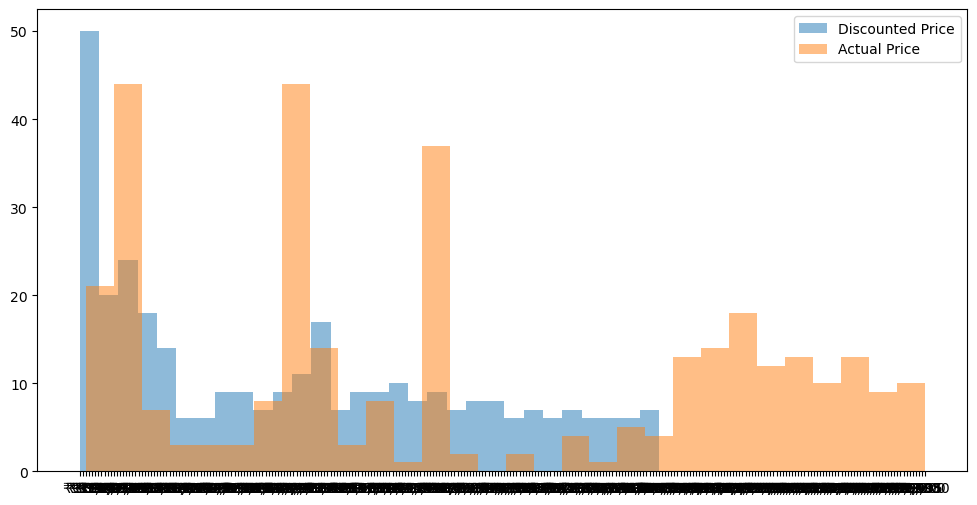

In [158]:
plt.figure(figsize=(12, 6))
plt.hist(df2_cleaned['discounted_price'], bins=30, alpha=0.5, label='Discounted Price')
plt.hist(df2_cleaned['actual_price'], bins=30, alpha=0.5, label='Actual Price')
plt.legend()
plt.show()


In [160]:
#Q4.  How does the average discount percentage vary across categories

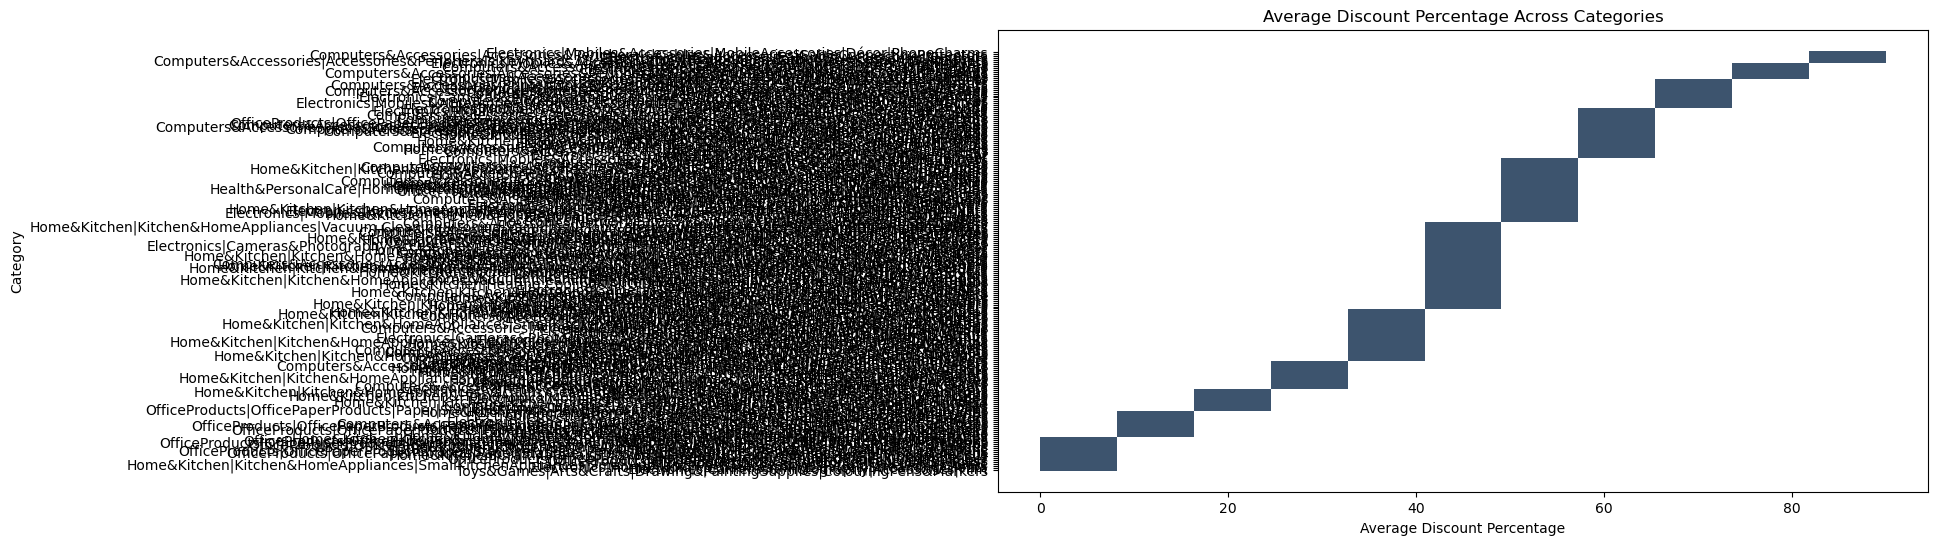

In [170]:
# Convert discount_percentage to numeric (remove % sign if present)

df2['discount_percentage'] = pd.to_numeric(df2['discount_percentage'], errors='coerce')

# Drop NaN values in discount_percentage
df2_cleaned = df2.dropna(subset=['discount_percentage'])

# Group by category and calculate the mean discount percentage
avg_discount = df2_cleaned.groupby('category')['discount_percentage'].mean().reset_index()

# Sort by discount percentage for better visualization
avg_discount = avg_discount.sort_values(by='discount_percentage', ascending=False)

# Plot the average discount percentage per category
plt.figure(figsize=(12, 6))
sns.histplot(x='discount_percentage', y='category', data=avg_discount, palette='viridis')
plt.xlabel('Average Discount Percentage')
plt.ylabel('Category')
plt.title('Average Discount Percentage Across Categories')
plt.show()


In [172]:
#Q5.  What are the most popular product names

In [174]:
df2.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [176]:
df2.product_name.unique()

array(['Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)',
       'Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)',
       'Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices',
       ...,
       'Bajaj Majesty RX10 2000 Watts Heat Convector Room Heater (White, ISI Approved)',
       'Havells Ventil Air DSP 230mm Exhaust Fan (Pista Green)',
       'Borosil Jumbo 1000-Watt Grill Sandwich Maker (Black)'],
      dtype=object)

In [182]:
# Group by product_name and sum rating_count
popular_products = df2_cleaned.groupby('product_name')['rating_count'].sum().reset_index()

In [184]:
popular_products = popular_products.sort_values(by='rating_count', ascending=False)

# Show top 10 most popular products
print(popular_products.head(5))

                                           product_name  rating_count
325   Duracell USB Lightning Apple Certified (Mfi) B...        2445.0
1237  Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...        1948.0
121   Ambrane 2 in 1 Type-C & Micro USB Cable with 6...        1806.0
1179  Wecool Unbreakable 3 in 1 Charging Cable with ...        1312.0
1022  Sounce 65W OnePlus Dash Warp Charge Cable, 6.5...        1151.0


In [190]:
#Q6.  What are the most popular product keywords

In [186]:
df2_cleaned = df2.dropna(subset=['product_name'])

# Split product names into individual words
words = df2_cleaned['product_name'].str.lower().str.split(expand=True).stack()

# Count the occurrences of each word
keyword_counts = words.value_counts()

top_keywords = keyword_counts.head(10)

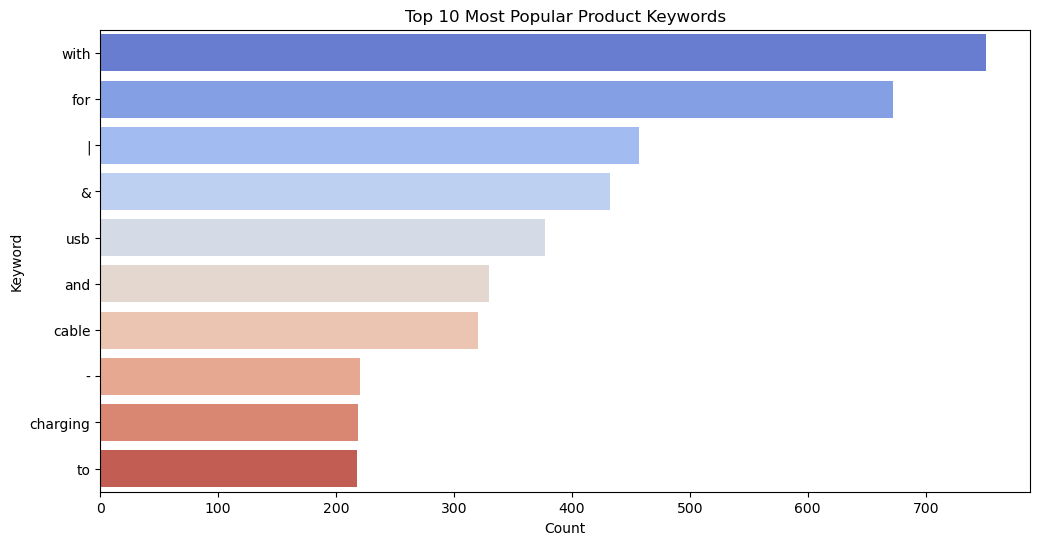

In [188]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_keywords.values, y=top_keywords.index, palette='coolwarm')

plt.xlabel('Count')
plt.ylabel('Keyword')
plt.title('Top 10 Most Popular Product Keywords')
plt.show()

In [192]:
#Q6.   What are the most popular product reviews

In [194]:
df2.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [202]:
# Drop NaN values
df2_cleaned = df2.dropna(subset=['review_content', 'rating_count'])

# Convert rating_count to numeric
df2_cleaned['rating_count'] = pd.to_numeric(df2_cleaned['rating_count'], errors='coerce')

# Sort by highest rating_count
popular_reviews = df2_cleaned[['review_content', 'rating_count']].sort_values(by='rating_count', ascending=False)

# Display top 10 most popular reviews
print(popular_reviews.head(10))


                                         review_content  rating_count
1279  Does the job well,doesn't work on sand. though...         992.0
750   Nive,very good batteries received,Like,Good pr...         989.0
1059  Bottle quality is not good.,Best for hot water...         976.0
151   Not charging as fast as I'd have expected. May...         974.0
32    Not charging as fast as I'd have expected. May...         974.0
823   Not charging as fast as I'd have expected. May...         974.0
1272  Ok,The product works very well. The support is...         959.0
1259  I bought 5ltr 3kw model 10 days before Provide...         942.0
214   The remote works well and is pleasantly compat...         928.0
1262  It’s a good product and I’m using it since 1 w...         925.0


In [204]:
#Q7. What is the correlation between discounted_price and rating

In [206]:
df2.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [210]:
df2.discounted_price.dtypes

dtype('O')

In [214]:
df2.discounted_price.unique()

array(['₹399', '₹199', '₹329', '₹154', '₹149', '₹176.63', '₹229', '₹499',
       '₹299', '₹219', '₹350', '₹159', '₹349', '₹13,999', '₹249',
       '₹13,490', '₹970', '₹279', '₹59', '₹11,499', '₹14,999', '₹179',
       '₹389', '₹599', '₹99', '₹899', '₹32,999', '₹209', '₹19,999',
       '₹999', '₹333', '₹507', '₹309', '₹1,199', '₹799', '₹6,999', '₹230',
       '₹649', '₹15,999', '₹348', '₹32,990', '₹139', '₹263', '₹7,999',
       '₹1,599', '₹26,999', '₹115', '₹10,901', '₹1,434', '₹7,299', '₹325',
       '₹29,999', '₹27,999', '₹30,990', '₹269', '₹24,999', '₹18,990',
       '₹290', '₹345', '₹1,099', '₹719', '₹849', '₹21,999', '₹449',
       '₹37,999', '₹7,390', '₹273.10', '₹15,990', '₹210', '₹1,299',
       '₹347', '₹228', '₹1,499', '₹8,499', '₹20,990', '₹9,999', '₹489',
       '₹23,999', '₹689', '₹1,699', '₹655', '₹749', '₹195', '₹416',
       '₹368', '₹29,990', '₹339', '₹15,490', '₹9,490', '₹637', '₹1,089',
       '₹12,499', '₹1,399', '₹88', '₹57.89', '₹205', '₹949', '₹379',
       '₹8,9

In [218]:
df2['discounted_price'] = df2['discounted_price'].str.replace('₹', '', regex=False)  # Remove ₹ symbol
df2['discounted_price'] = df2['discounted_price'].str.replace(',', '', regex=False)  # Remove commas
df2['discounted_price'] = pd.to_numeric(df2['discounted_price'], errors='coerce').astype('float')  # Convert to int

In [212]:
df2.rating.dtypes

dtype('float64')

In [220]:
correlation = df2[['discounted_price', 'rating']].corr()
print(correlation)

                  discounted_price    rating
discounted_price          1.000000  0.120337
rating                    0.120337  1.000000


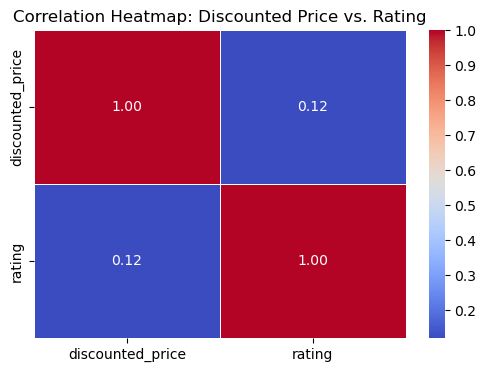

In [222]:


# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap: Discounted Price vs. Rating")
plt.show()

In [224]:
#Q9.What are the Top 5 categories based on the highest ratings

In [226]:
df2.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [230]:
df2.rating.dtypes

dtype('float64')

In [234]:
df2.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64

# EDA_4

In [18]:
# Q1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do  the needful

In [4]:
df3=pd.read_csv('spotify.csv')
df3.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [8]:
df3.shape

(440, 5)

In [10]:
df3.dtypes

Artist           object
Track Name       object
Popularity        int64
Duration (ms)     int64
Track ID         object
dtype: object

In [12]:
df3.isna().sum()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [14]:
df3.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [20]:
df3.duplicated().sum()

27

In [22]:
df3.drop_duplicates(inplace=True) 

In [24]:
df3.duplicated().sum()

0

In [26]:
df3.shape

(413, 5)

In [28]:
# Q2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

In [30]:
df3.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

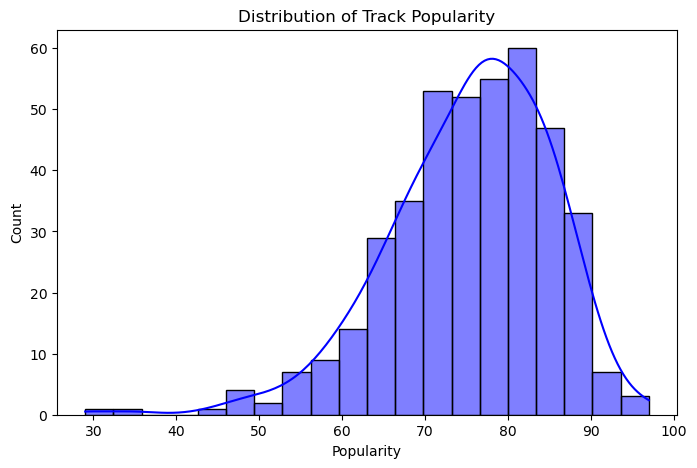

In [36]:
plt.figure(figsize=(8, 5))

# Plot histogram with KDE (Kernel Density Estimate)
sns.histplot(df3["Popularity"], bins=20, kde=True, color="blue")

# Add labels and title
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

In [40]:
#Q3. is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

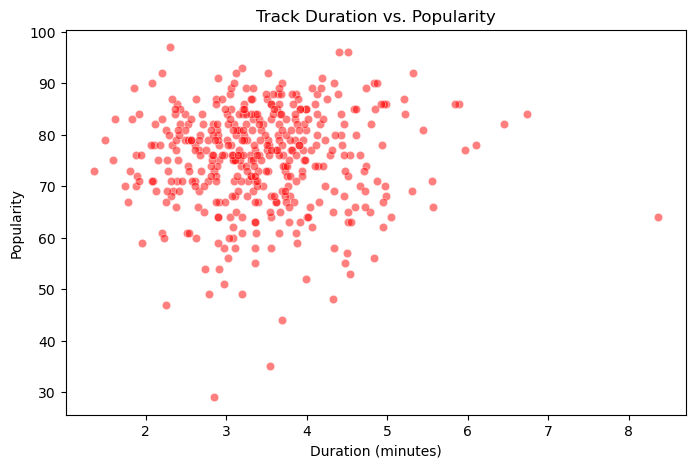

In [46]:
df3["Duration (min)"] = df3["Duration (ms)"] / 60000

# Set figure size
plt.figure(figsize=(8, 5))

# Scatter plot
sns.scatterplot(x=df3["Duration (min)"], y=df3["Popularity"], alpha=0.5, color="red")

# Add labels and title
plt.title("Track Duration vs. Popularity")
plt.xlabel("Duration (minutes)")
plt.ylabel("Popularity")
plt.show()

In [48]:
#Q4.  Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

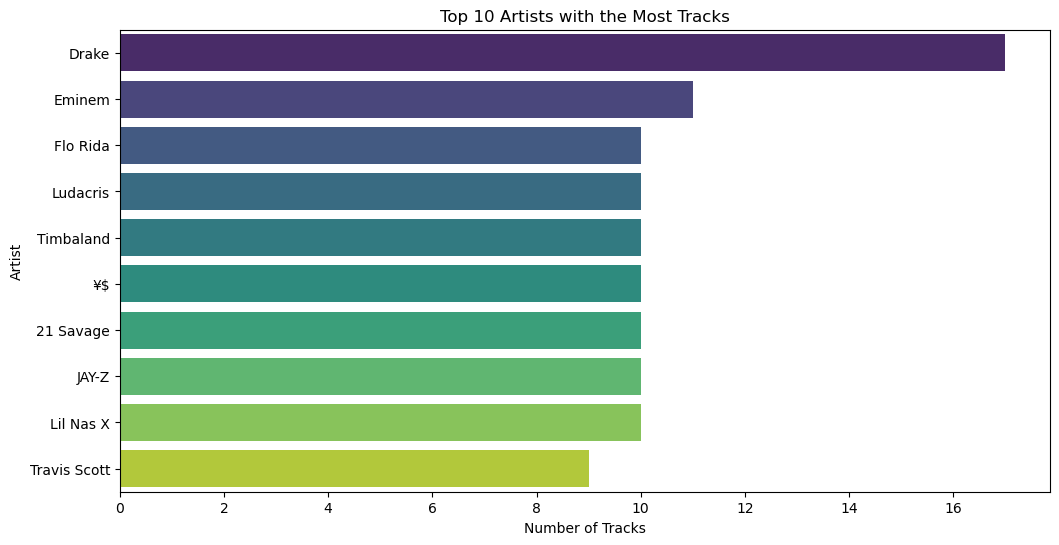

In [52]:
plt.figure(figsize=(12, 6))

# Plot the count of tracks for each artist (Top 10 artists for better visualization)
top_artists = df3["Artist"].value_counts().index[:10]  # Selecting top 10 artists
sns.countplot(y=df3[df3["Artist"].isin(top_artists)]["Artist"], order=top_artists, palette="viridis")

# Add labels and title
plt.title("Top 10 Artists with the Most Tracks")
plt.xlabel("Number of Tracks")
plt.ylabel("Artist")
plt.show()

In [54]:
#Q5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

In [56]:
df3.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID',
       'Duration (min)'],
      dtype='object')

In [90]:
df3.sort_values(by="Popularity").head(5)[["Artist", "Track Name", "Popularity"]]

,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


In [92]:
#Q6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist

In [94]:
# Group by artist and calculate the average popularity
artist_avg_popularity = df3.groupby("Artist")["Popularity"].mean()

# Get the top 5 most popular artists (highest average popularity)
top_5_artists = artist_avg_popularity.nlargest(5)

# Display the result
print(top_5_artists)

Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64


In [96]:
#Q7.  For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

In [100]:
df3.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID',
       'Duration (min)'],
      dtype='object')

In [114]:
# Find the top 5 artists based on average popularity
top_5_artists = df3.groupby("Artist")["Popularity"].mean().nlargest(5).index

# Filter dataset to include only tracks from the top 5 artists
df_top_artists = df3[df3["Artist"].isin(top_5_artists)]

# Sort by popularity in descending order and drop duplicates to keep the most popular track per artist
most_popular_tracks = df_top_artists.sort_values(by="Popularity", ascending=False).drop_duplicates(subset=["Artist"])

# Select only relevant columns
most_popular_tracks = most_popular_tracks[["Artist", "Track Name", "Popularity"]]

# Display result
print(most_popular_tracks)


           Artist                    Track Name  Popularity
260            ¥$                      CARNIVAL          96
30   Travis Scott    FE!N (feat. Playboi Carti)          93
140         cassö                         Prada          92
241        Trueno  Mamichula - con Nicki Nicole          89
200  David Guetta            Baby Don't Hurt Me          87


In [116]:
#Q8.  Visualize relationships between multiple numerical variables simultaneously using a pair plot

In [118]:
df3.dtypes

Artist             object
Track Name         object
Popularity          int64
Duration (ms)       int64
Track ID           object
Duration (min)    float64
dtype: object

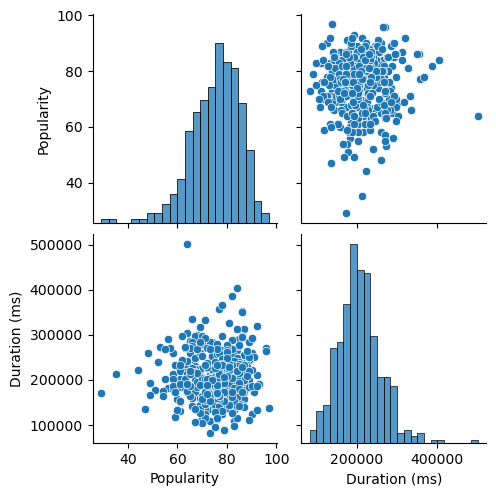

In [120]:
cols=['Popularity','Duration (ms)']
sns.pairplot(df3[cols],palette = 'husl')
plt.show()

In [122]:
#Q9.  Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

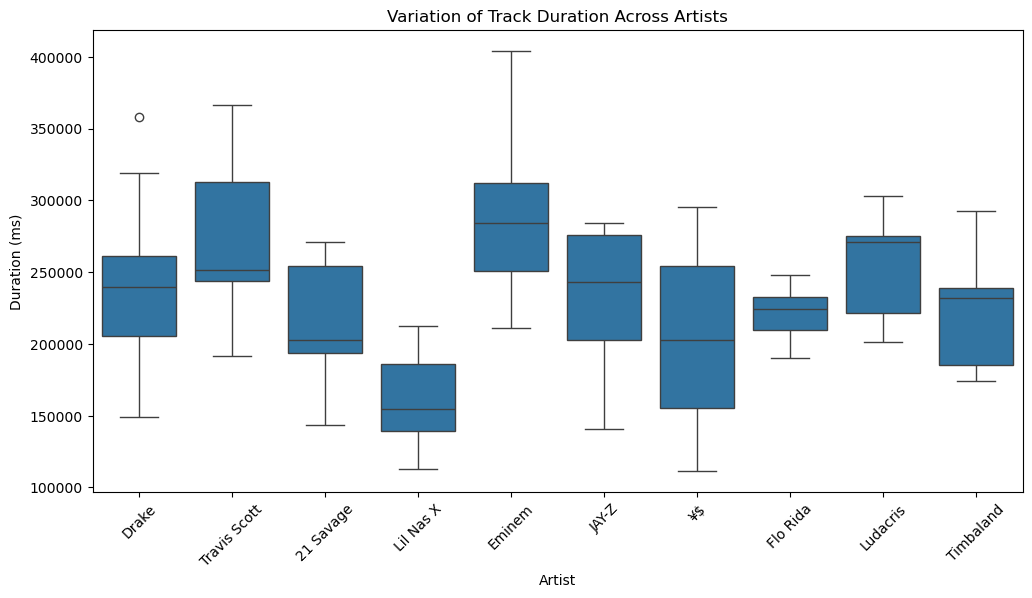

In [124]:


# Select the top 10 most frequent artists to avoid overcrowding
top_10_artists = df3["Artist"].value_counts().head(10).index
df_top_artists = df3[df3["Artist"].isin(top_10_artists)]

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Artist", y="Duration (ms)", data=df_top_artists)
plt.xticks(rotation=45)  # Rotate artist names for better readability
plt.title("Variation of Track Duration Across Artists")
plt.xlabel("Artist")
plt.ylabel("Duration (ms)")
plt.show()


In [126]:
#Q10.  How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

In [128]:
df3.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID',
       'Duration (min)'],
      dtype='object')

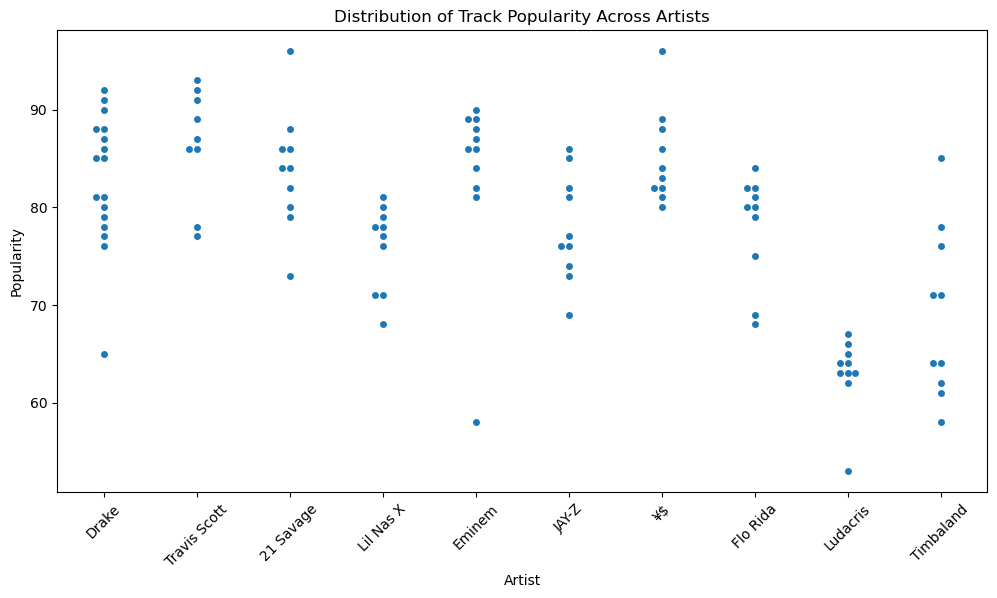

In [130]:
top_10_artists = df3["Artist"].value_counts().head(10).index
df_top_artists = df3[df3["Artist"].isin(top_10_artists)]

# Create the swarm plot
plt.figure(figsize=(12, 6))
sns.swarmplot(x="Artist", y="Popularity", data=df_top_artists, size=5)
plt.xticks(rotation=45)  # Rotate artist names for better readability
plt.title("Distribution of Track Popularity Across Artists")
plt.xlabel("Artist")
plt.ylabel("Popularity")
plt.show()